<div style="background-color: #145D91; color: white; font-variant: small-caps; padding: 10px; text-align: center;">
  <span style="font-size: 14pt;">Part 03 A:</span>
  <span style="font-size: 26pt; font-weight: bold;"> Data Visualization</span>
</div>

<div style="background-color: #145D91; color: white; padding: 10px; text-align: center;">
  <span style="font-size: 14pt; font-weight: bold; font-color: #87B5D6"> Decade of Entry Data: Analyze by Percentage and Volume</span><br>  
</div>

<div style="background-color: #2A7AB8; padding: 10px; margin-top: 10px;">
  <b>Importing Python libraries and loading required dataset.</b>
</div>

In [83]:

# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import plotly.express as px
import plotly.graph_objects as go
import math
from matplotlib.patches import Patch
import folium
import json
import urllib.request

In [84]:

#state_table
file_path_state_table = '../Capstone Project/state_table.csv'
state_table = pd.read_csv(file_path_state_table)
print('state_table loaded')
#border_table
file_path_border_table = '../Capstone Project/border_table.csv'
border_table = pd.read_csv(file_path_border_table)
print('border_table loaded')
#measure_table
file_path_measure_table = '../Capstone Project/measure_table.csv'
measure_table = pd.read_csv(file_path_measure_table)
print('measure_table loaded')
#port_table
file_path_port_table = '../Capstone Project/port_table.csv'
port_table = pd.read_csv(file_path_port_table)
print('port_table loaded')
#month_table
file_path_month_table = '../Capstone Project/month_table.csv'
month_table = pd.read_csv(file_path_month_table)
print('month_table loaded')
#finalized_broder_crossing_df
file_path_finalized_broder_crossing_df = '../Capstone Project/finalized_broder_crossing_df.csv'
finalized_broder_crossing_df = pd.read_csv(file_path_finalized_broder_crossing_df)
print('finalized_broder_crossing_df loaded')

state_table loaded
border_table loaded
measure_table loaded
port_table loaded
month_table loaded
finalized_broder_crossing_df loaded


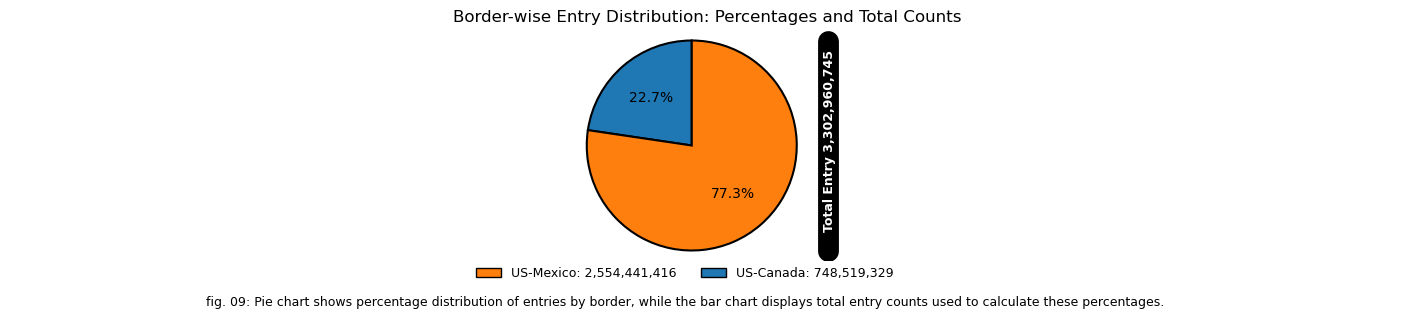

In [85]:

# --- Process data ---
border_values = finalized_broder_crossing_df.groupby('Border_Code')['Value'].sum().reset_index()
border_values = pd.merge(border_values, border_table, on='Border_Code')

total_value = border_values['Value'].sum()

fig, ax = plt.subplots(figsize=(18, 3))

color_map = {}
used_colors = []

# Plot pie chart
wedges, texts, autotexts = ax.pie(
    border_values['Value'],
    #labels=border_values['Border'],
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops=dict(width=1, edgecolor='black', linewidth=1.5)
)
border_codes = border_values['Border_Code']
# Store color for each border (first appearance)
for j, bc in enumerate(border_codes):
    if bc not in color_map:
       color_map[bc] = wedges[j].get_facecolor()
       used_colors.append(wedges[j].get_facecolor())

radius = wedges[0].r  # default radius = 1

line_x = 1.3  # position outside the pie chart radius
line_y_bottom = -radius
line_y_top = radius

# Draw thick vertical line
ax.plot([line_x, line_x], [line_y_bottom, line_y_top], color='black', lw=15, solid_capstyle='round')

# Label at bottom (outside)
#ax.text(line_x + 0.25, line_y_bottom, '0', va='center')

# Vertical max value text inside the thick line, centered horizontally and vertically near the top
text = f'Total Entry {total_value:,}'
ax.text(line_x + 0.01, line_y_top - 0.95, text, va='center', ha='center',
        rotation=90, color='white', fontsize=9, fontweight='bold')

# Calculate total border entries across all years
border_totals = finalized_broder_crossing_df.groupby('Border_Code')['Value'].sum().reset_index()
border_totals = pd.merge(border_totals, border_table, on='Border_Code')
border_totals = border_totals.sort_values(by='Value', ascending=False).reset_index(drop=True)

legend_patches = []
for _, row in border_totals.iterrows():
    color = color_map.get(row['Border_Code'], 'gray')  # fallback to gray
    label = f"{row['Border']}: {row['Value']:,}"
    patch = Patch(facecolor=color, edgecolor='black', label=label)
    legend_patches.append(patch)


# Add central bottom legend
fig.legend(handles=legend_patches, loc='lower center', bbox_to_anchor=(0.5, 0.01), ncol=2, fontsize=9, frameon=False)

fig.text(0.5, -0.05, 'fig. 09: Pie chart shows percentage distribution of entries by border, while the bar chart displays total entry counts used to calculate these percentages.', ha='center', va='bottom', fontsize=9, fontstyle='normal')

# Equal aspect and remove axes
ax.axis('equal')
ax.axis('off')

plt.title('Border-wise Entry Distribution: Percentages and Total Counts')
plt.show()

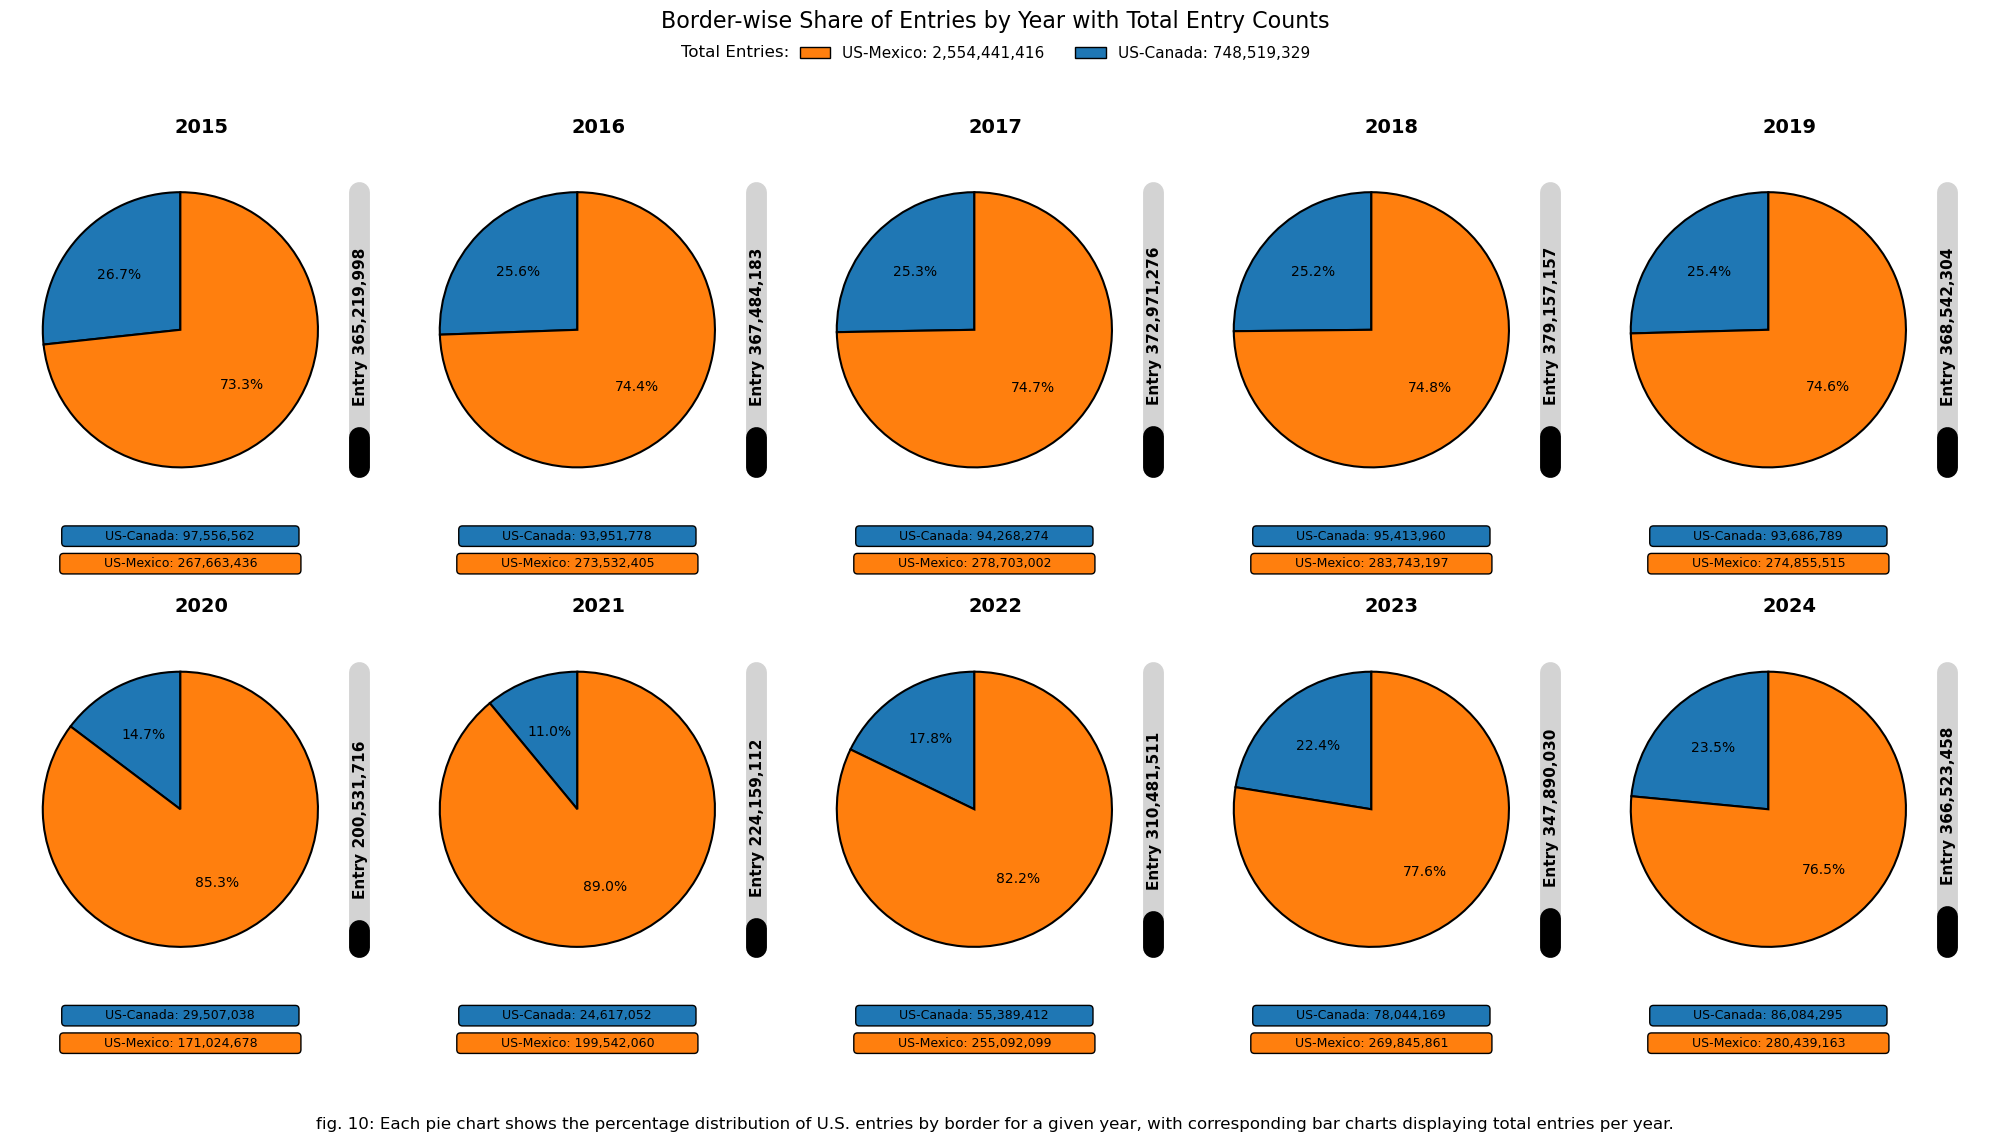

In [86]:


# Group by Year and Border_Code to get values
year_border_values = finalized_broder_crossing_df.groupby(['Year', 'Border_Code'])['Value'].sum().reset_index()
year_border_values = pd.merge(year_border_values, border_table, on='Border_Code')

# Calculate total per year (for scale bar)
total_per_year = year_border_values.groupby('Year')['Value'].sum().to_dict()

years = sorted(year_border_values['Year'].unique())
max_total_value = border_values['Value'].sum()

# Layout: 5 pie charts per row
n_cols = 5
n_rows = math.ceil(len(years) / n_cols)

fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 5.5))  # Slightly taller to fit legend
axs = axs.flatten()

color_map = {}
used_colors = []

for i, year in enumerate(years):
    ax = axs[i]

    # Data for this year
    df_year = year_border_values[year_border_values['Year'] == year]
    values = df_year['Value']
    labels = df_year['Border']
    border_codes = df_year['Border_Code']

    total_value = total_per_year[year]

    # Pie chart
    wedges, texts, autotexts = ax.pie(
        values,
        #labels=labels,
        autopct='%1.1f%%',
        startangle=90,
        wedgeprops=dict(width=1, edgecolor='black', linewidth=1.5)
    )

    # Store color for each border (first appearance)
    for j, bc in enumerate(border_codes):
        if bc not in color_map:
            color_map[bc] = wedges[j].get_facecolor()
            used_colors.append(wedges[j].get_facecolor())

    radius = wedges[0].r  # default radius = 1

    # Vertical scale bar
    line_x = 1.3
    line_y_bottom = -radius
    line_y_top = radius

    # Draw background scale
    ax.plot([line_x, line_x], [line_y_bottom, line_y_top],
            color='lightgray', lw=15, solid_capstyle='round')

    # Draw current year scale
    fill_height = (total_value / max_total_value) * (2 * radius)
    ax.plot([line_x, line_x], [line_y_bottom, line_y_bottom + fill_height],
            color='black', lw=15, solid_capstyle='round')

    # Text inside the bar
    ax.text(line_x + 0.01, line_y_bottom + fill_height + 0.8,
            f'Entry {total_value:,}', va='center', ha='center',
            rotation=90, color='black', fontsize=11, fontweight='bold')

    # Title for year
    ax.set_title(str(year), fontsize=14, fontweight='bold')

    # --- Add mini-legend below pie chart ---
    y_offset = -1.5  # starting y offset
    spacing = 0.2    # vertical space between each border entry

    for idx, row in df_year.iterrows():
        bc = row['Border_Code']
        border = row['Border']
        value = row['Value']
        color = color_map.get(bc, 'gray')
        ax.text(0, y_offset - ((idx - df_year.index.min()) * spacing),
                f'          {border}: {value:,}          ',
                fontsize=9,
                color='black',
                ha='center',
                va='center',
                bbox=dict(facecolor=color, edgecolor='black', boxstyle='round,pad=0.3'))

    # Style axis
    ax.axis('equal')
    ax.axis('off')

# Hide any unused axes
for j in range(i + 1, n_rows * n_cols):
    axs[j].axis('off')

# ---- Add color legend at the bottom ----
# Calculate total border entries across all years
border_totals = finalized_broder_crossing_df.groupby('Border_Code')['Value'].sum().reset_index()
border_totals = pd.merge(border_totals, border_table, on='Border_Code')
border_totals = border_totals.sort_values(by='Value', ascending=False).reset_index(drop=True)

legend_patches = []
for _, row in border_totals.iterrows():
    color = color_map.get(row['Border_Code'], 'gray')  # fallback to gray
    label = f"{row['Border']}: {row['Value']:,}"
    patch = Patch(facecolor=color, edgecolor='black', label=label)
    legend_patches.append(patch)


plt.suptitle('Border-wise Share of Entries by Year with Total Entry Counts', fontsize=16, y=1.05)
# Create a dummy invisible axis just for the Total Entry label
fig.text(0.37, 1.011, 'Total Entries:', ha='center', va='center', fontsize=12
        # , fontweight='bold'
        )
# Add central bottom legend
fig.legend(handles=legend_patches, loc='upper center', ncol=2, fontsize=11, frameon=False, bbox_to_anchor=(0.53, 1.03))

fig.text(0.5, 0.03, 'fig. 10: Each pie chart shows the percentage distribution of U.S. entries by border for a given year, with corresponding bar charts displaying total entries per year.', ha='center', va='bottom', fontsize=12, fontstyle='normal')

# Adjust layout
plt.subplots_adjust(hspace=2)  # Increase vertical space between rows
plt.tight_layout(rect=[0, 0.08, 1, 1])  # leave space for bottom legend
plt.show()


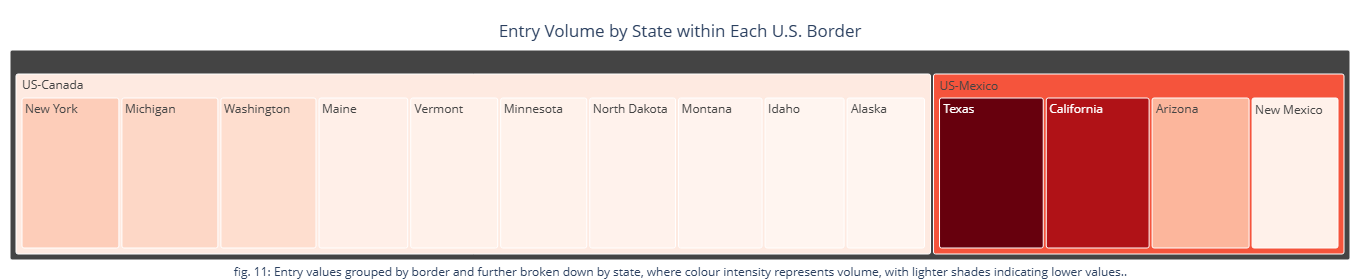

In [87]:


# Merge finalized_broder_crossing_df with state_table to get the State name
finalized_df = finalized_broder_crossing_df \
    .merge(state_table[['Abbr', 'State', 'State_Code']], on='State_Code', how='left')

# Merge finalized_df with border_table to get the Border name
finalized_df = finalized_df.merge(border_table[['Border', 'Border_Code']], on='Border_Code', how='left')

# Group by Border and State, and sum the Value (total crossing value per state under each border)
border_state_totals = finalized_df.groupby(['Border', 'State'])['Value'].sum().reset_index()

# Apply log transformation to the 'Value' column to scale down large values
border_state_totals['Log_Value'] = np.log(border_state_totals['Value'] + 1)  # Adding 1 to avoid log(0)

# Create the treemap using Plotly, now using Log_Value for both size and color
fig = px.treemap(
    border_state_totals,
    path=['Border', 'State'],  # Group by Border and then State
    values='Log_Value',  # Size of each rectangle based on log-transformed crossing value
    color='Value',  # Color based on log-transformed value
    color_continuous_scale='Reds',  # Color scale
    #title="Entry Volume by State within Each U.S. Border"
)

fig.update_traces(
   hoverinfo='skip',
    hovertemplate=None,
    marker=dict(cornerradius=2)
)
# Hide the legend and the color scale
fig.update_layout(
    #showlegend=False,           # Hide the legend for the colors
    coloraxis_showscale=False   # Hide the color scale itself
)

fig.update_layout(
        title=dict(
        text="Entry Volume by State within Each U.S. Border",
        x=0.5,            # Centers the title horizontally
        xanchor='center',
        yanchor='top'
    ),
     width=1350,  # Adjust the width (in pixels)
    height=280,
    #autosize=True,  # Automatically adjust size to fit content
    margin=dict(t=50, b=20, l=10, r=10),  # Remove margins (t=top, b=bottom, l=left, r=right)
    showlegend=False,  # Hide the legend for the colors
    coloraxis_showscale=False  # Hide the color scale itself
)

fig.add_annotation(
    text="fig. 11: Entry values grouped by border and further broken down by state, where colour intensity represents volume, with lighter shades indicating lower values..",
    x=0.5,
    y=-0.1,  # bottom of the figure
    xref="paper",
    yref="paper",
    showarrow=False,
    font=dict(size=12),
    xanchor='center',
    yanchor='bottom'
)
# Show the treemap
fig.show()


<div style="padding: 10px;">
    <p style="font-size: 14px; color: red;">
    <b>Note:</b> In real-world geography, Alaska is located to the northwest of Canada, along the eastern border of the country. However, in this choropleth map, it appears below, near the Mexico border. This misplacement is due to the map projection used and could lead to confusion. Be aware of this distortion to avoid any misinterpretation of the map data.
</p>
</div>

In [88]:

# Create the map centered roughly between Alaska, USA, and Canada
m = folium.Map(
    location=[60, -110],
    zoom_start=2.5,
    width=1320,
    height=550
)

# GeoJSON URL with US states and Canada provinces (Natural Earth simplified)
geojson_url = 'https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json'

# Load GeoJSON data
with urllib.request.urlopen(geojson_url) as url:
    data = json.loads(url.read().decode())

# Country names to highlight
countries_to_highlight = {
    'United States of America': 'green',
    'Canada': 'red',
    'Alaska': 'blue',  # Note: Alaska is part of USA polygon here, so separate highlight is tricky with this file
    'Mexico': 'blue'
}

Alaska_highlight = {
    'Alaska': 'blue'  # Note: Alaska is part of USA polygon here, so separate highlight is tricky with this file
}

# Since Alaska is part of USA in this dataset, we'll highlight USA & Canada only.

# Add polygons for USA and Canada with different colors
for feature in data['features']:
    name = feature['properties']['name']
    if name in countries_to_highlight:
        folium.GeoJson(
            feature,
            name=name,
            style_function=lambda feature, color=countries_to_highlight[name]: {
                'fillColor': color,
                'color': color,
                'weight': 1,
                'fillOpacity': 0.4,
            }
        ).add_to(m)

for feature in data['features']:
    name = feature['properties']['name']
    if name in Alaska_highlight:
        folium.GeoJson(
            feature,
            name=name,
            style_function=lambda feature, color=Alaska_highlight[name]: {
                'fillColor': color,
                'color': color,
                'weight': 1,
                'fillOpacity': 1,
            }
        ).add_to(m)

# Add layer control (optional)
folium.LayerControl().add_to(m)

m


In [89]:

# Merge finalized_broder_crossing_df with state_table to get the State name
finalized_df = finalized_broder_crossing_df \
    .merge(state_table[['Abbr', 'State', 'State_Code']], on='State_Code', how='left')

# Group by State and sum the Value
state_totals = finalized_df.groupby('State')['Value'].sum().reset_index()

# Create a function to format large values
def format_value(value):
    if value >= 1_000_000:
        return f"{value/1_000_000:.1f} M"
    elif value >= 1_000:
        return f"{value/1_000:.1f} K"
    else:
        return str(value)

# Apply the formatting function to the 'Value' column
state_totals['Formatted_Value'] = state_totals['Value'].apply(format_value)

# Create the formatted "Entry" string with both raw and formatted values
state_totals['Entry'] = state_totals.apply(
    lambda row: f"{row['Value']:,} ({row['Formatted_Value']})", axis=1
)

# Join state_totals with state_table to get State Code for plotting
state_totals = state_totals.merge(state_table[['Abbr', 'State', 'State_Code']], on='State', how='left')

# Set up the Choropleth map using Plotly
fig = px.choropleth(
    state_totals,
    locations="Abbr",  # Use State_Code to match on the map
    locationmode="USA-states",  # USA states mapping
    color="Value",  # Color based on total value (log)
    color_continuous_scale="Reds",  # Color scale
    scope="usa",  # Only show USA
    title="Geographic Distribution of U.S. Entries by State",
    hover_data={
        "State": True,  # Show State
        "Entry": True,
        "Formatted_Value": False,  # Show formatted value with K/M suffix
        "State_Code": False,  # Hide State Code
        "Value": False,
        "Abbr": False
    }
)

# Add state abbreviations using scattergeo for text annotations
fig.add_trace(go.Scattergeo(
    locations=state_totals['Abbr'],
    locationmode="USA-states",
    text=state_totals['Abbr'],
    mode='text',
    textfont=dict(size=12, color="black"),
    hoverinfo='none' 
))
# Adjust layout for fitting the map nicely
fig.update_layout(
    geo=dict(
        showland=True,
        landcolor="lightgray",  # Color for the land
        subunitcolor="gray",  # Color for subunits (state borders)
        showlakes=True,
        lakecolor="lightblue"
    ),
    margin={"r":0,"t":40,"l":0,"b":80},  # Adjust margins to fit better
    autosize=True,
    height=600,  # Set a comfortable height for the map
    width=1350,  # Set a comfortable width for the map
    title_x=0.5,  # Center title
    coloraxis_showscale=True,  # Hide the color scale itself
           coloraxis_colorbar=dict(
        title="",
        ticks="outside",
        tickvals=[0, 0.5, 1],
        ticktext=["Low", "Medium", "High"],
        len=1,  # length of colorbar
        thickness=15,
        outlinewidth=1,
        bgcolor='white'
    )
)

fig.add_annotation(
    text="fig. 12: Total entry volume across U.S. states, represented through color intensity from light (low) to dark (high).",
    x=0.5,
    y=-0.1,  # bottom of the figure
    xref="paper",
    yref="paper",
    showarrow=False,
    font=dict(size=12, color='black', family='Arial'),
    xanchor='center',
    yanchor='bottom'
)

# Show the map
fig.show()

We used a log transformation (logarithmic scaling) to compress large values, making the data more interpretable and visually balanced by reducing the impact of extreme outliers. 

In [90]:

# Merge finalized_broder_crossing_df with state_table to get the State name
finalized_df = finalized_broder_crossing_df \
    .merge(state_table[['Abbr', 'State', 'State_Code']], on='State_Code', how='left')

# Group by State and sum the Value
state_totals = finalized_df.groupby('State')['Value'].sum().reset_index()

# Apply log transformation to 'Value' column
state_totals['Log_Value'] = np.log(state_totals['Value'] + 1)  # Adding 1 to avoid log(0)

# Create a function to format large values
def format_value(value):
    if value >= 1_000_000:
        return f"{value/1_000_000:.1f} M"
    elif value >= 1_000:
        return f"{value/1_000:.1f} K"
    else:
        return str(value)

# Apply the formatting function to the 'Value' column
state_totals['Formatted_Value'] = state_totals['Value'].apply(format_value)

# Create the formatted "Entry" string with both raw and formatted values
state_totals['Entry'] = state_totals.apply(
    lambda row: f"{row['Value']:,} ({row['Formatted_Value']})", axis=1
)

# Join state_totals with state_table to get State Code for plotting
state_totals = state_totals.merge(state_table[['Abbr', 'State', 'State_Code']], on='State', how='left')

# Set up the Choropleth map using Plotly
fig = px.choropleth(
    state_totals,
    locations="Abbr",  # Use State_Code to match on the map
    locationmode="USA-states",  # USA states mapping
    color="Log_Value",  # Color based on total value (log)
    color_continuous_scale="Reds",  # Color scale
    scope="usa",  # Only show USA
    title="Geographic Distribution of U.S. Entries by State (Logarithmic Representation)",
    hover_data={
        "State": True,  # Show State
        "Entry": True,
        "Formatted_Value": False,  # Show formatted value with K/M suffix
        "State_Code": False,  # Hide State Code
        "Log_Value": False,
        "Abbr": False
    }
)

# Add state abbreviations using scattergeo for text annotations
fig.add_trace(go.Scattergeo(
    locations=state_totals['Abbr'],
    locationmode="USA-states",
    text=state_totals['Abbr'],
    mode='text',
    textfont=dict(size=12, color="#302509"),
    hoverinfo='none' 
))
# Adjust layout for fitting the map nicely
fig.update_layout(
    geo=dict(
        showland=True,
        landcolor="#CBD973",  # Color for the land
        subunitcolor="gray",  # Color for subunits (state borders)
        showlakes=True,
        lakecolor="lightblue"
    ),
    margin={"r":0,"t":40,"l":0,"b":80},  # Adjust margins to fit better
    autosize=True,
    height=600,  # Set a comfortable height for the map
    width=1350,  # Set a comfortable width for the map
    title_x=0.5,  # Center title
    coloraxis_showscale=True,  # Hide the color scale itself
       coloraxis_colorbar=dict(
        title="",
        ticks="outside",
        tickvals=[0, 0.5, 1],
        ticktext=["Low", "Medium", "High"],
        len=1,  # length of colorbar
        thickness=15,
        outlinewidth=1,
        bgcolor='white'
    )
)

fig.add_annotation(
    text="fig. 13: Total entry volume across U.S. states using a log scale, represented through color intensity from light (low) to dark (high).",
    x=0.5,
    y=-0.1,  # bottom of the figure
    xref="paper",
    yref="paper",
    showarrow=False,
    font=dict(size=12, color='black', family='Arial'),
    xanchor='center',
    yanchor='bottom'
)

# Show the map
fig.show()

In [91]:

# Merge finalized_broder_crossing_df with state_table to get the State name
finalized_df = finalized_broder_crossing_df.merge(state_table[['Abbr', 'State', 'State_Code']], on='State_Code', how='left')

# Merge finalized_df with border_table to get the Border name
finalized_df = finalized_df.merge(port_table[['Port Name', 'Port Code']], on='Port Code', how='left')

# Merge finalized_df with border_table to get the Border name
finalized_df = finalized_df.merge(border_table[['Border', 'Border_Code']], on='Border_Code', how='left')

# Group by Border and State, and sum the Value (total crossing value per state under each border)
border_state_totals = finalized_df.groupby(['Border_Code', 'Border', 'State', 'Port Code', 'Port Name'])['Value'].sum().reset_index()

# Apply log transformation to the 'Value' column to scale down large values
border_state_totals['Log_Value'] = np.log(border_state_totals['Value'] + 1)  # Adding 1 to avoid log(0)

border_state_totals['Value_Formatted'] = border_state_totals['Value'].apply(lambda x: f"{int(x/1_000_000)}M" if x >= 1_000_000 else f"{x:,}")

# Create the treemap using Plotly, now using Log_Value for both size and color
fig = px.treemap(
    border_state_totals,
    path=['Border', 'Port Name', 'Value_Formatted'],  
    values='Log_Value',  # Size of each rectangle based on log-transformed crossing value
    color='Log_Value',  # Color based on log-transformed value
    color_continuous_scale='Oranges',  # Color scale
    #title="U.S. Entry Volume by Border and Port (Logarithmic Representation)",
    hover_name='State'
)


fig.update_traces(
   hoverinfo='skip',
    hovertemplate=None,
    marker=dict(cornerradius=2)
)

# Hide the legend and the color scale
fig.update_layout(
    #showlegend=False,           # Hide the legend for the colors
    coloraxis_showscale=False   # Hide the color scale itself
)

fig.update_layout(
     title=dict(
        text="U.S. Entry Volume by Border and Port (Logarithmic Representation)",
        x=0.5,            # Centers the title horizontally
        xanchor='center',
        yanchor='top'
    ),
     width=1350,  # Adjust the width (in pixels)
    height=400,
    #autosize=True,  # Automatically adjust size to fit content
    margin=dict(t=50, b=30, l=10, r=10),  # Remove margins (t=top, b=bottom, l=left, r=right)
    showlegend=False,  # Hide the legend for the colors
    coloraxis_showscale=False  # Hide the color scale itself
)

fig.add_annotation(
    text="fig. 14: Hierarchical representation of U.S. entry data, grouped by border and port using log scale. Larger and darker sections indicate higher entry volumes.",
    x=0.5,
    y=-0.1,  # bottom of the figure
    xref="paper",
    yref="paper",
    showarrow=False,
    font=dict(size=12),
    xanchor='center',
    yanchor='bottom'
)

# Show the treemap
fig.show()


In [92]:

# Merge finalized_broder_crossing_df with state_table to get the State name
finalized_df = finalized_broder_crossing_df .merge(state_table[['Abbr', 'State', 'State_Code']], on='State_Code', how='left')

# Merge finalized_df with border_table to get the Border name
finalized_df = finalized_df.merge(port_table[['Port Name', 'Port Code']], on='Port Code', how='left')

# Merge finalized_df with border_table to get the Border name
finalized_df = finalized_df.merge(border_table[['Border', 'Border_Code']], on='Border_Code', how='left')

# Group by Border and State, and sum the Value (total crossing value per state under each border)
border_state_totals = finalized_df.groupby(['Border', 'State', 'Port Name'])['Value'].sum().reset_index()

# Apply log transformation to the 'Value' column to scale down large values
border_state_totals['Log_Value'] = np.log(border_state_totals['Value'] + 1)  # Adding 1 to avoid log(0)

border_state_totals['Value_Formatted'] = border_state_totals['Value'].apply(lambda x: f"{int(x/1_000_000)}M" if x >= 1_000_000 else f"{x:,}")

# Create the treemap using Plotly, now using Log_Value for both size and color
fig = px.treemap(
    border_state_totals,
    path=['State', 'Port Name','Value_Formatted'],  # Group by Border and then State
    values='Log_Value',  # Size of each rectangle based on log-transformed crossing value
    color='Log_Value',  # Color based on log-transformed value
    color_continuous_scale='Reds',  # Color scale
    #title="U.S. Entry Volume by State and Port (Logarithmic Representation)",
    hover_name='State'
)


fig.update_traces(
   hoverinfo='skip',
    hovertemplate=None,
    marker=dict(cornerradius=2)
)

# Hide the legend and the color scale
fig.update_layout(
    #showlegend=False,           # Hide the legend for the colors
    coloraxis_showscale=False   # Hide the color scale itself
)

fig.update_layout(
     title=dict(
        text="U.S. Entry Volume by State and Port (Logarithmic Representation)",
        x=0.5,            # Centers the title horizontally
        xanchor='center',
        yanchor='top'
    ),
     width=1350,  # Adjust the width (in pixels)
    height=400,
    #autosize=True,  # Automatically adjust size to fit content
    margin=dict(t=50, b=30, l=10, r=10),  # Remove margins (t=top, b=bottom, l=left, r=right)
    showlegend=False,  # Hide the legend for the colors
    coloraxis_showscale=False  # Hide the color scale itself
)

fig.add_annotation(
    text="fig. 15: Hierarchical representation of U.S. entry data, grouped by state and port using log scale. Larger and darker sections indicate higher entry volumes.",
    x=0.5,
    y=-0.1,  # bottom of the figure
    xref="paper",
    yref="paper",
    showarrow=False,
    font=dict(size=12),
    xanchor='center',
    yanchor='bottom'
)


# Show the treemap
fig.show()


In [93]:

# Select only relevant columns
selected_df = finalized_broder_crossing_df[['Port Code', 'Latitude', 'Longitude', 'State_Code', 'Border_Code']]

# Drop duplicate port codes to get one unique row per port
finalized_df = selected_df.drop_duplicates(subset='Port Code')

# Merge finalized_broder_crossing_df with state_table to get the State name
finalized_df = finalized_df \
    .merge(state_table[['Abbr', 'State', 'State_Code']], on='State_Code', how='left') \
    .merge(port_table, on='Port Code', how='right') \
    .merge(border_table, on='Border_Code', how='left')

# Group by State and sum the Value
state_totals = finalized_broder_crossing_df.groupby(['State_Code'])['Value'].sum().reset_index()

# Apply log transformation to 'Value' column
state_totals['Log_Value'] = np.log(state_totals['Value'] + 1)  # Adding 1 to avoid log(0)

# Join state_totals with state_table to get State Code for plotting
state_totals = state_totals.merge(state_table[['Abbr', 'State', 'State_Code']], on='State_Code', how='left')

# --- Prepare port hover text ---
finalized_df['hover_text'] = (
    'Port: ' + finalized_df['Port Name'].fillna('Unknown') + '<br>' +
    'State: ' + finalized_df['State'].fillna('Unknown') + '<br>' +
    'Border: ' + finalized_df['Border'].fillna('Unknown') + '<br>' +
    'Port Code: ' + finalized_df['Port Code'].astype(str)
)

# Set up the Choropleth map using Plotly
fig = px.choropleth(
    state_totals,
    locations="Abbr",  # Use State_Code to match on the map
    locationmode="USA-states",  # USA states mapping
    color="Log_Value",  # Color based on total value (log)
    color_continuous_scale="Blues",  # Color scale
    scope="usa",  # Only show USA
    title="Geographic Distribution of Ports and State Entry Volumes (Logarithmic Representation)",
    hover_data={
        "Log_Value": False,
        "Abbr": False
    }
)

# Add state abbreviations using scattergeo for text annotations
fig.add_trace(go.Scattergeo(
    locations=state_totals['Abbr'],
    locationmode="USA-states",
    text=state_totals['Abbr'],
    mode='text',
    textfont=dict(size=12, color="black"),
    hoverinfo='none' ,
    #name='none',
    showlegend=False
))
# --- Add port scatter points ---
fig.add_trace(go.Scattergeo(
    lon=finalized_df['Longitude'],
    lat=finalized_df['Latitude'],
    text=finalized_df['hover_text'],
    mode='markers',
    marker=dict(size=8, color="crimson", opacity=0.8, symbol='circle'),
    hoverinfo='text',
    #name='none',
    showlegend=False
))
# Adjust layout for fitting the map nicely
fig.update_layout(
    geo=dict(
        showland=True,
        landcolor="#FFFFFF",  # Color for the land
        subunitcolor="gray",  # Color for subunits (state borders)
        showlakes=True,
        lakecolor="lightblue"
    ),
    margin={"r":0,"t":40,"l":0,"b":80},  # Adjust margins to fit better
    autosize=True,
    height=550,  # Set a comfortable height for the map
    width=1350,  # Set a comfortable width for the map
    title_x=0.5,  # Center title
    coloraxis_showscale=False  # Hide the color scale itself
)

fig.add_annotation(
    text="fig. 16: Map showing locations of U.S. ports with states highlighted from light to dark based on entry volumes using log scale.",
    x=0.5,
    y=-0.1,  # bottom of the figure
    xref="paper",
    yref="paper",
    showarrow=False,
    font=dict(size=12, color='black', family='Arial'),
    xanchor='center',
    yanchor='bottom'
)

# Show the map
fig.show()

In [94]:

# Merge finalized_broder_crossing_df with state_table to get the State name
finalized_df = finalized_broder_crossing_df \
    .merge(state_table[['Abbr', 'State', 'State_Code']], on='State_Code', how='left')

# Merge finalized_df with border_table to get the Border name
finalized_df = finalized_df.merge(port_table[['Port Name', 'Port Code']], on='Port Code', how='left')

# Merge finalized_df with border_table to get the Border name
finalized_df = finalized_df.merge(border_table[['Border', 'Border_Code']], on='Border_Code', how='left')

# Group by Border and State, and sum the Value (total crossing value per state under each border)
border_state_totals = finalized_df.groupby(['Border', 'State','Port Code', 'Port Name'])['Value'].sum().reset_index()

# Apply log transformation to the 'Value' column to scale down large values
border_state_totals['Log_Value'] = np.log(border_state_totals['Value'] + 1)  # Adding 1 to avoid log(0)

# Create the treemap using Plotly, now using Log_Value for both size and color
fig = px.treemap(
    border_state_totals,
    path=['Port Name', 'State', 'Border' ],  # Group by Border and then State
    values='Log_Value',  # Size of each rectangle based on log-transformed crossing value
    color='Log_Value',  # Color based on log-transformed value
    color_continuous_scale='Inferno_r',  # Color scale
    #title="U.S. Entry Volume by Port, State and Border (Logarithmic Representation)",
    hover_name='State'
)


fig.update_traces(
   hoverinfo='skip',
    hovertemplate=None,
    marker=dict(cornerradius=5)
)

# Hide the legend and the color scale
fig.update_layout(
    #showlegend=False,           # Hide the legend for the colors
    coloraxis_showscale=False   # Hide the color scale itself
)

fig.update_layout(
    title=dict(
        text="U.S. Entry Volume by Port, State and Border (Logarithmic Representation)",
        x=0.5,            # Centers the title horizontally
        xanchor='center',
        yanchor='top'
    ),
     width=1350,  # Adjust the width (in pixels)
    height=400,
    #autosize=True,  # Automatically adjust size to fit content
    margin=dict(t=50, b=30, l=10, r=10),  # Remove margins (t=top, b=bottom, l=left, r=right)
    showlegend=False,  # Hide the legend for the colors
    coloraxis_showscale=False,  # Hide the color scale itself
)

fig.add_annotation(
    text="fig. 17: Hierarchical visualization of U.S. entry volumes starting from ports, aggregated into states and borders using log scale. Area and color intensity correspond to entry magnitude.",
    x=0.5,
    y=-0.07,  # bottom of the figure
    xref="paper",
    yref="paper",
    showarrow=False,
    font=dict(size=12),
    xanchor='center',
    yanchor='bottom'
)

# Show the treemap
fig.show()
